In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-12-13_164435_on_off_test_weirdness.npd/')

In [4]:
npd.node_names()

['SingleSweepStream0', 'SingleSweep1', 'SingleStream2', 'ADCSnap3']

In [5]:
sss = npd.SingleSweepStream0

In [6]:
sss.stream.roach_state.dac_attenuation

33.0

In [7]:
snap = npd.ADCSnap3

In [8]:
snap.x.ptp()

33.0

In [9]:
snap.y.ptp()

31.0

In [10]:
sss.stream.tone_offset_frequency()

array([ -1.25000000e-01,   3.19875000e+02])

In [11]:
sss.set_q_and_x(deglitch=False)
sss.set_S(binned=False)

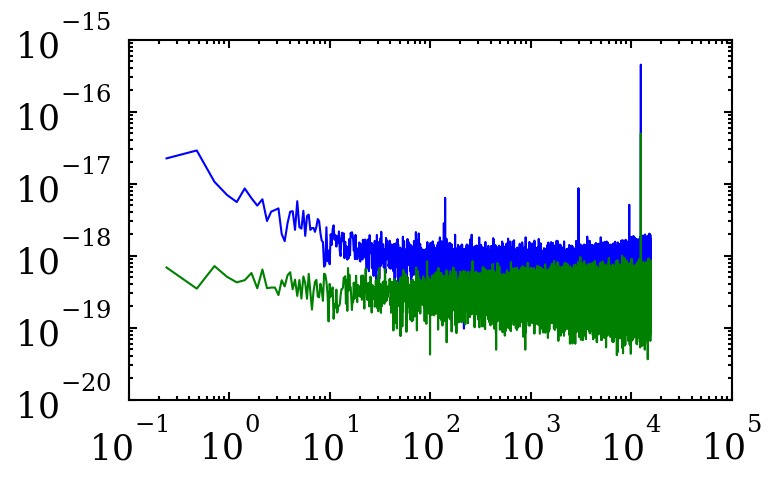

In [12]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(sss.S_frequency, sss.S_xx)
ax.plot(sss.S_frequency, sss.S_yy)

In [15]:
sss.S_frequency[sss.S_xx == sss.S_xx.max()]

array([ 12500.04768372])

In [ ]:
fig, ax = plt.subplots()
ax.plot(sss.stream.s21_raw.real, '-b')
ax.plot(sss.stream.s21_raw.imag, '-g')

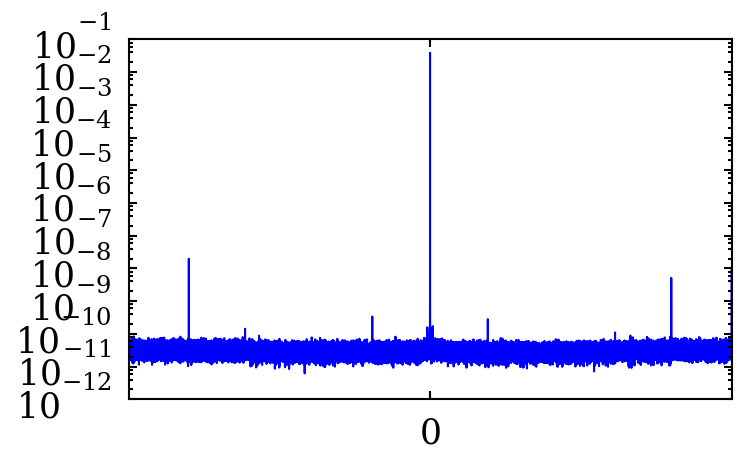

In [14]:
fig, ax = plt.subplots()
ax.set_xscale('symlog')
ax.set_yscale('log')
S_s21, f_s21 = plt.mlab.psd(sss.stream.s21_raw, NFFT=sss.stream.s21_raw.size // 8, window=plt.mlab.window_hanning,
                            noverlap=sss.stream.s21_raw.size // 16)
ax.plot(f_s21, S_s21)